In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\aaron\.cache\kagglehub\datasets\laotse\credit-risk-dataset\versions\1


In [26]:
import pandas as pd
import os

# 1. Listar los archivos en la ruta para identificar el nombre exacto
files = os.listdir(path)
print("Archivos encontrados:", files)

# 2. Identificar el archivo CSV (usualmente es 'credit_risk_dataset.csv')
# Buscamos el archivo que termine en .csv dentro de la carpeta
csv_file = [f for f in files if f.endswith('.csv')][0]
full_path = os.path.join(path, csv_file)

# 3. Cargar el DataFrame
df_stori = pd.read_csv(full_path)

# 4. Verificación rápida
print(f"Dataset cargado con {df_stori.shape[0]} filas y {df_stori.shape[1]} columnas.")
display(df_stori.head())

Archivos encontrados: ['credit_risk_dataset.csv']
Dataset cargado con 32581 filas y 12 columnas.


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


La variable objetivo (Target) es loan_status.

En este dataset, loan_status es una variable binaria donde:

0: Indica que el préstamo fue pagado (cliente "bueno").

1: Indica que el cliente cayó en incumplimiento o "default" (cliente "malo").


## Diccionario de Variables

1. ### Perfil del Cliente (Demografía y Estabilidad)
person_age: Edad del solicitante. Útil para ver si la madurez financiera influye en el pago.

person_income: Ingreso anual. Es la base de la capacidad de pago.

person_home_ownership: Situación de vivienda (Renta, Hipoteca, Propia). En riesgo, alguien que posee su casa suele considerarse más estable que alguien que renta.

person_emp_length: Años trabajando en su empleo actual. Es un indicador crítico de estabilidad laboral. (Ojo: tiene 2.7% de nulos).

2. ### Detalles del Préstamo (El producto)
loan_intent: El motivo del préstamo (Educación, Médico, Inversión, etc.). Algunos fines son más riesgosos que otros.

loan_grade: Calificación del préstamo (A, B, C...). Es una categoría de riesgo asignada previamente. Las "A" son las más seguras.

loan_amnt: El monto total solicitado.

loan_int_rate: Tasa de interés. A mayor tasa, suele haber mayor riesgo (o el banco cobra más porque sabe que es difícil que paguen). (Ojo: tiene 9.5% de nulos).

loan_percent_income: Qué porcentaje del ingreso anual representa el préstamo. Es un indicador de sobreendeudamiento. Si es muy alto, el cliente tendrá dificultades para pagar sus gastos básicos y el crédito.

3. ### Historial Crediticio (Comportamiento pasado)
cb_person_default_on_file: Si el cliente ya tiene un registro de "default" en el Buró de Crédito (Y/N). Es quizás el predictor más fuerte: "quien ya falló, es probable que falle de nuevo".

cb_person_cred_hist_length: Años desde que el cliente tuvo su primer crédito. Un historial largo suele significar más experiencia manejando deudas.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_data_health_report(df):
    """
    Genera un reporte profesional sobre la salud del dataset: 
    nulos, tipos de datos, valores únicos y porcentaje de completitud.
    """
    health_report = pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        '% Missing': (df.isnull().sum() / len(df)) * 100,
        'Unique Values': df.nunique(),
    })
    return health_report.sort_values(by='% Missing', ascending=False)

# Uso:
report = get_data_health_report(df_stori)
print(report)

                           Data Type  Missing Values  % Missing  Unique Values
loan_int_rate                float64            3116   9.563856            348
person_emp_length            float64             895   2.747000             36
person_income                  int64               0   0.000000           4295
person_age                     int64               0   0.000000             58
person_home_ownership         object               0   0.000000              4
loan_intent                   object               0   0.000000              6
loan_grade                    object               0   0.000000              7
loan_amnt                      int64               0   0.000000            753
loan_status                    int64               0   0.000000              2
loan_percent_income          float64               0   0.000000             77
cb_person_default_on_file     object               0   0.000000              2
cb_person_cred_hist_length     int64               0

C:\Users\aaron\AppData\Local\Temp\ipykernel_21544\375546053.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target_col, data=df, palette='viridis')


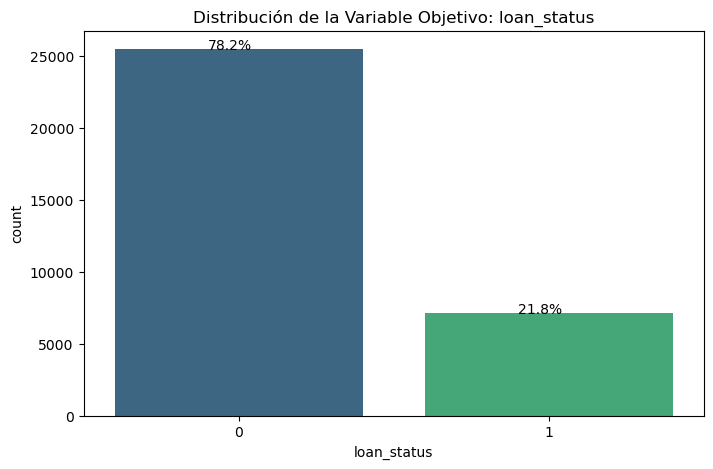

In [28]:
def plot_target_distribution(df, target_col):
    """
    Visualiza la distribución de la variable objetivo y 
    calcula la tasa de default base.
    """
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=target_col, data=df, palette='viridis')
    
    # Calcular porcentajes
    total = len(df[target_col])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + 0.3, p.get_height() + 0.5))
    
    plt.title(f'Distribución de la Variable Objetivo: {target_col}')
    plt.show()


plot_target_distribution(df_stori, 'loan_status')

C:\Users\aaron\AppData\Local\Temp\ipykernel_21544\1971060079.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, ax=axes[i], palette='magma')
C:\Users\aaron\AppData\Local\Temp\ipykernel_21544\1971060079.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, ax=axes[i], palette='magma')
C:\Users\aaron\AppData\Local\Temp\ipykernel_21544\1971060079.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, ax=axes[i], palette='magma')
C:\Users\aaron\AppData\Local\Temp\ipyker

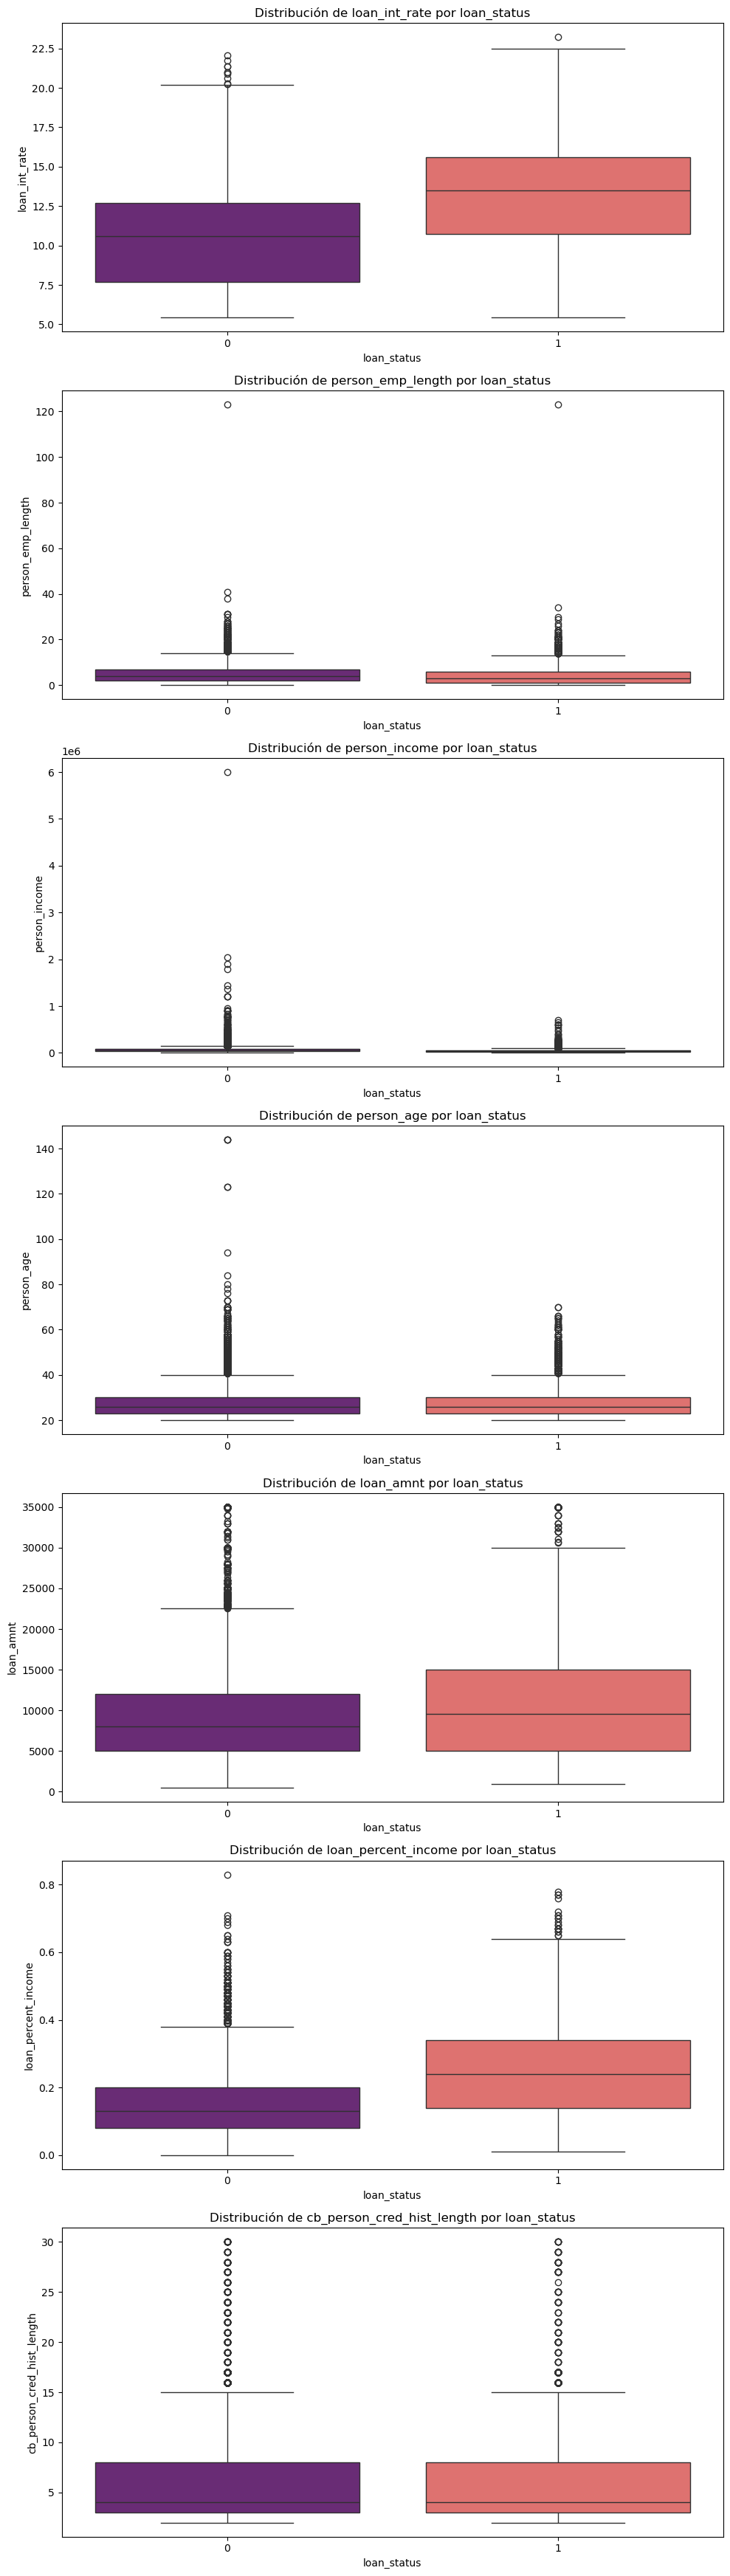

In [29]:
def plot_numerical_distributions(df, features, target):
    """
    Compara la distribución de variables numéricas respecto al target 
    usando Boxplots para detectar outliers y diferencias de comportamiento.
    """
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=(10, 5 * n_features))
    
    for i, col in enumerate(features):
        sns.boxplot(x=target, y=col, data=df, ax=axes[i], palette='magma')
        axes[i].set_title(f'Distribución de {col} por {target}')
    
    plt.tight_layout()
    plt.show()

numeric_cols = ['loan_int_rate', 'person_emp_length', 'person_income', 'person_age', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length']
plot_numerical_distributions(df_stori, numeric_cols, 'loan_status')

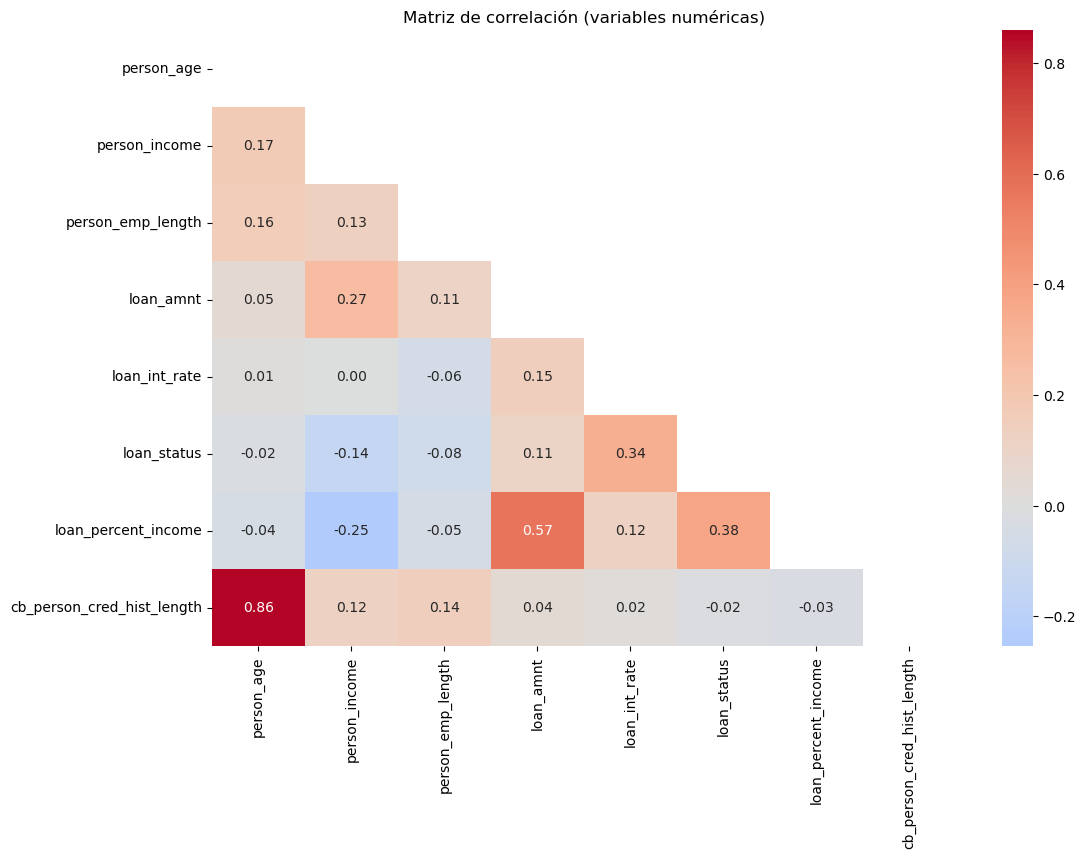

In [30]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    
    df_num = df.select_dtypes(include=["number"])
    corr = df_num.corr()
    
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        center=0
    )
    
    plt.title("Matriz de correlación (variables numéricas)")
    plt.show()


plot_correlation_heatmap(df_stori)

In [31]:
def categorical_default_rate(df, cat_col, target_col):
    """
    Muestra la tasa de default por categoría.
    """
    summary = (
        df.groupby(cat_col)[target_col]
        .agg(
            count='count',
            default_rate='mean'
        )
        .sort_values(by='default_rate', ascending=False)
    )
    
    summary['default_rate'] = summary['default_rate'] * 100
    return summary

In [32]:
def plot_default_rate_bar(df, cat_col, target_col):
    """
    Barplot de la tasa de default por categoría.
    """
    rates = df.groupby(cat_col)[target_col].mean().sort_values()
    
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=rates.index,
        y=rates.values,
        palette='rocket'
    )
    
    plt.ylabel('Default Rate')
    plt.xlabel(cat_col)
    plt.title(f'Tasa de default por {cat_col}')
    plt.xticks(rotation=45)
    plt.show()

In [33]:
def plot_category_distribution_by_target(df, cat_col, target_col):
    """
    Distribución de categorías separadas por target.
    """
    plt.figure(figsize=(10, 5))
    sns.countplot(
        x=cat_col,
        hue=target_col,
        data=df,
        palette='Set2'
    )
    plt.title(f'Distribución de {cat_col} por {target_col}')
    plt.xticks(rotation=45)
    plt.show()


In [34]:
def categorical_crosstab(df, cat_col, target_col):
    """
    Tabla de proporciones por categoría.
    """
    return pd.crosstab(
        df[cat_col],
        df[target_col],
        normalize='index'
    )


In [35]:
def plot_categorical_heatmap(df, cat_col, target_col):
    """
    Heatmap de proporciones categóricas vs target.
    """
    table = pd.crosstab(
        df[cat_col],
        df[target_col],
        normalize='index'
    )
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(table, annot=True, fmt=".2f", cmap="Reds")
    plt.title(f'{cat_col} vs {target_col}')
    plt.show()

,count,default_rate
loan_grade,,
G,64,98.437500
F,241,70.539419
E,964,64.419087
D,3626,59.045780
C,6458,20.733973
B,10451,16.275954
A,10777,9.956389


C:\Users\aaron\AppData\Local\Temp\ipykernel_21544\542046807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


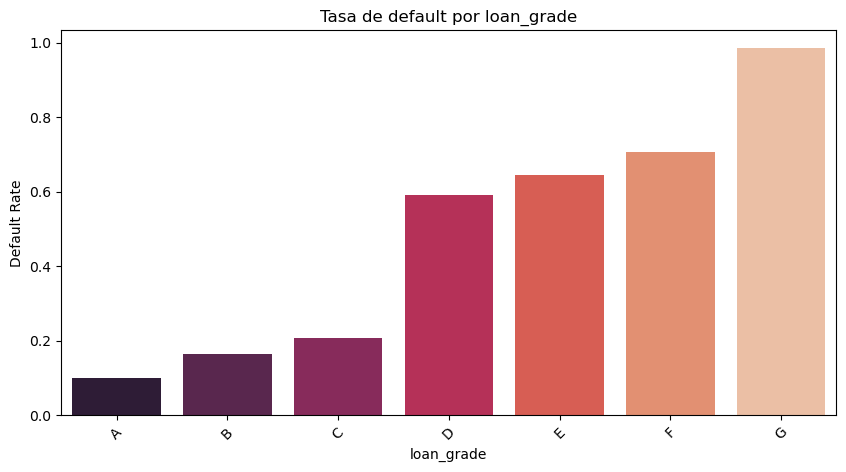

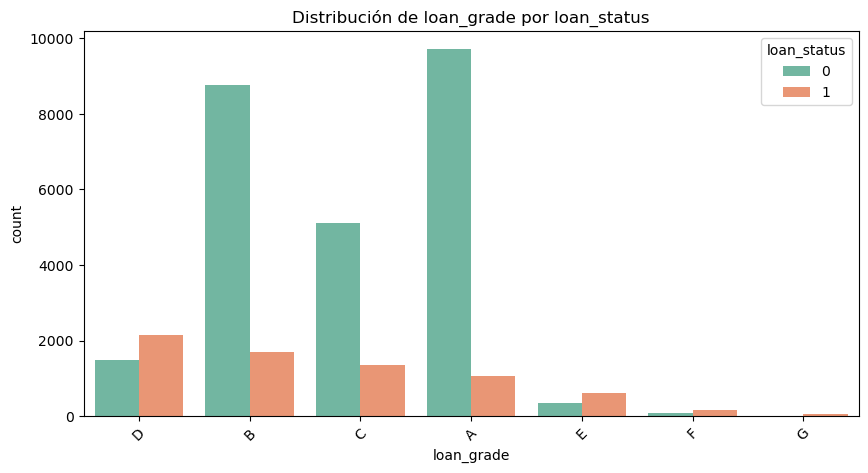

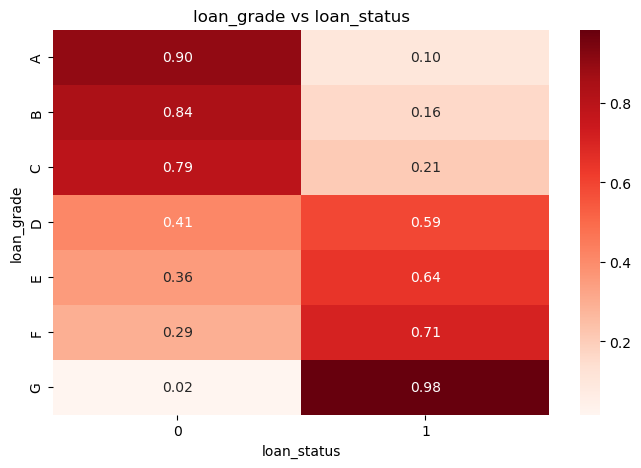

,count,default_rate
cb_person_default_on_file,,
Y,5745,37.806789
N,26836,18.393203


C:\Users\aaron\AppData\Local\Temp\ipykernel_21544\542046807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


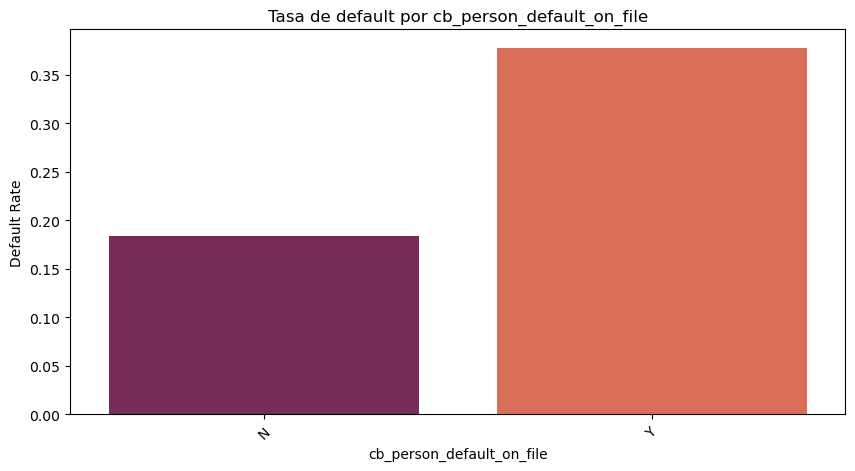

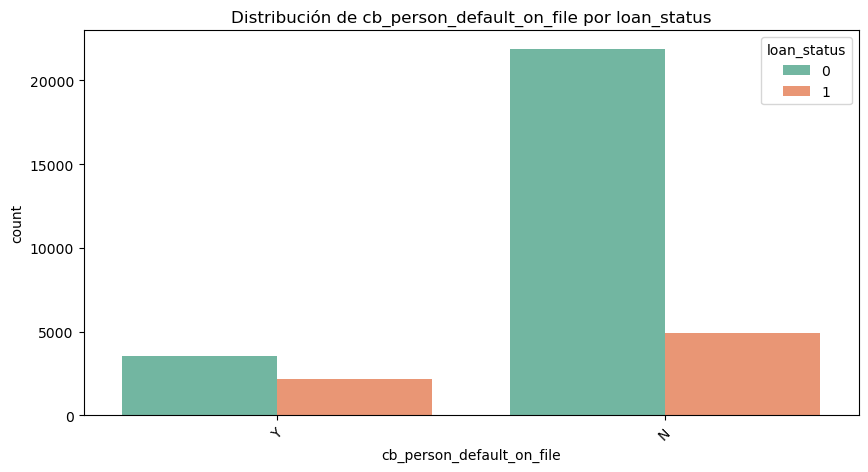

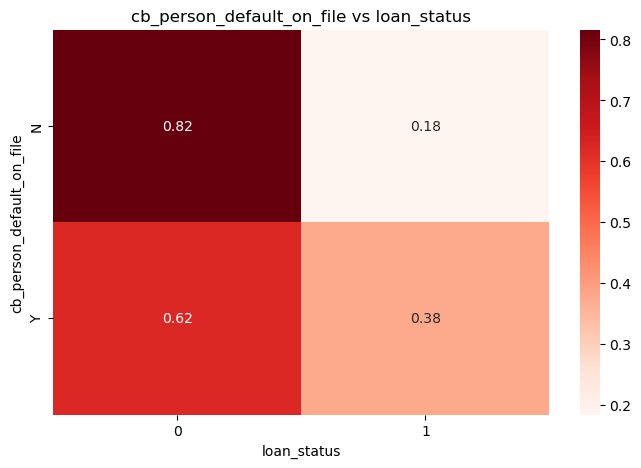

,count,default_rate
person_home_ownership,,
RENT,16446,31.569987
OTHER,107,30.841121
MORTGAGE,13444,12.570663
OWN,2584,7.469040


C:\Users\aaron\AppData\Local\Temp\ipykernel_21544\542046807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


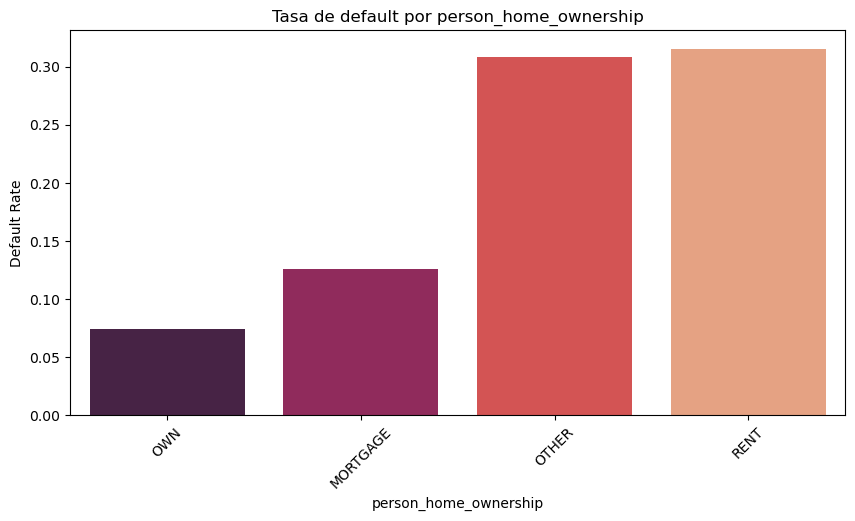

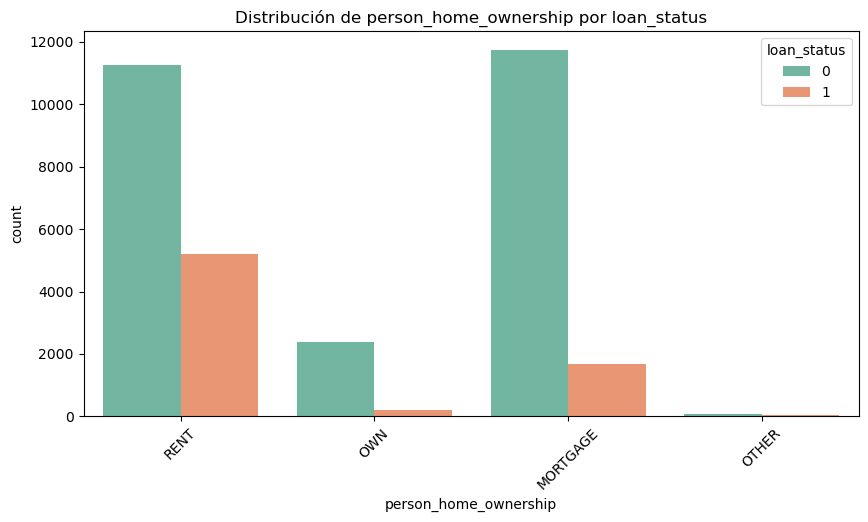

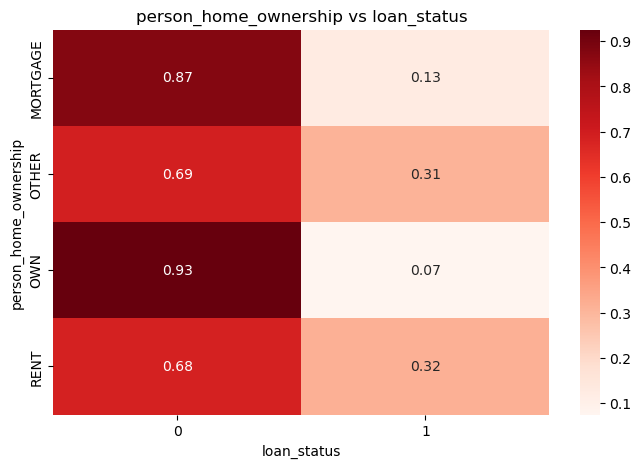

,count,default_rate
loan_intent,,
DEBTCONSOLIDATION,5212,28.587874
MEDICAL,6071,26.700708
HOMEIMPROVEMENT,3605,26.102635
PERSONAL,5521,19.887702
EDUCATION,6453,17.216798
VENTURE,5719,14.810282


C:\Users\aaron\AppData\Local\Temp\ipykernel_21544\542046807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


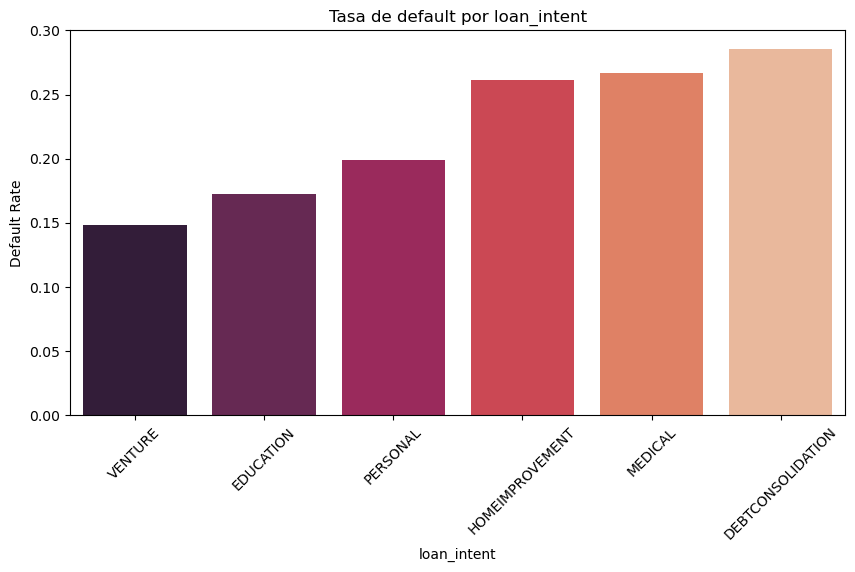

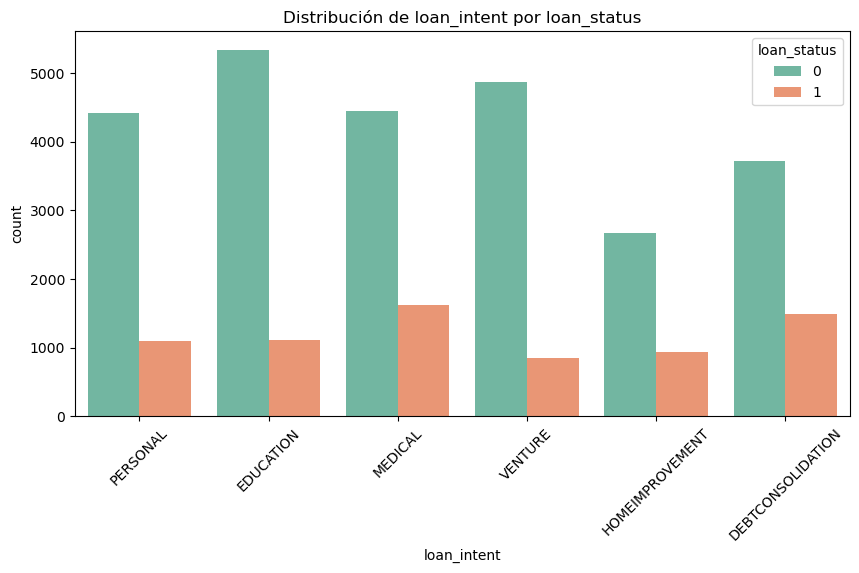

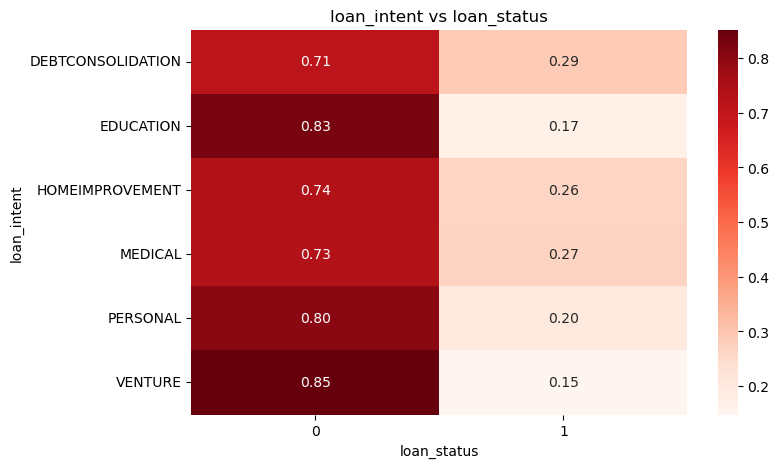

In [36]:
for col in [
    'loan_grade',
    'cb_person_default_on_file',
    'person_home_ownership',
    'loan_intent'
]:
    display(categorical_default_rate(df_stori, col, 'loan_status'))
    categorical_default_rate(df_stori, col, 'loan_status')
    plot_default_rate_bar(df_stori, col, 'loan_status')
    plot_category_distribution_by_target(df_stori, col, 'loan_status')
    categorical_crosstab(df_stori, col, 'loan_status')
    plot_categorical_heatmap(df_stori, col, 'loan_status')

    